# Część 1. sieci płytkie - Sieć dwuwarstwowa do nauki problemu XOR


#### Autorzy projektu:
* Sebastian Żółkiewicz, 259337
* Piotr Kulczycki, 259257
#### Zajęcia:
*    Sieci neuronowe i systemy rozmyte W04ISA-SM0402G
#### Grupa:
*    nr 1, 11:15 - 13:00
#### Prowadzący:
*    dr inż. Piotr Ciskowski



### Wykonane elementy wymagene do zaliczenia na 3

* Krótki opis problemu
* Opis zaimplementowanych funkcji
* Opis zaimplementowanych zmiennych i stałych

* Wykresy błędu MSE w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym)
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1)
* wykresy wag w obu warstwach.

* opcja szybszego kończenia uczenia (po osiągnięciu zadanego błędu)
* sprawozdanie (ten dokument)

### Wykonane elementy wymagene do zaliczenia na 4

* zmienny rozmiar kroku uczenia (mini-batch)


* momentum

* adaptacyjny współczynnik uczenia

<!-- 
## Mini kanban:
### Waiting
* dodanie momentum,
* adaptacyjny współczynnik uczenia

### In progres

### Ready
* Wykresy błędu MSE - dla całego ciągu uczącego 
* Dodać opisy zdjęć - skąd są
* ujednolicić nazwy zmiennych
* nazwa dla learn
* Opis zaimplementowanych funkcji
* Opis zaimplementowanych zmiennych i stałych - eze

### Done
* Zaimplelentować mini - batche 
* Wykresy błędu MSE    - dla warstwy ukrytej MSE
* Wykresy błędu MSE - dla przykładu uczącego
* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości
* wykresy błędu klasyfikacji
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1)
* Krótki opis problemu
* wykresy wag w obu warstwach. -->

## Część teoretyczna

### Opis Problemu - MLP for XOR problem
Problem XOR (Exclusive OR) stanowi kluczowy problem w uczeniu maszynowym, który ilustruje wyzwania związane z tworzeniem modeli opartych na neuronach lub sieciach neuronowych.

XOR to logiczna operacja, która zwraca prawdę (1) tylko wtedy, gdy jedno z wejść jest prawdziwe, a drugie fałszywe.

![Bramka XOR](./photos/XOR_tabela_prawdy.png )
 
*Zdj. 1. Tabela prawdy dla XOR - źródło https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7*


Problem polega na tym, że XOR nie jest liniowo separowalny - oznacza to, że nie można podzielić przestrzeni wejść linią (linią prostą w dwóch wymiarach lub płaszczyzną w trzech wymiarach), aby poprawnie oddzielić przypadki prawdziwe od fałszywych.

![Przestrzeń cech XOR](./photos/XOR_przestrzen_wejsc.png)

*Zdj. 2. Wykres wyjść dla XOR - źródło https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7*



Tradycyjne modele liniowe, takie jak regresja logistyczna czy perceptron, nie są w stanie modelować funkcji XOR, ponieważ nie mogą stworzyć odpowiedniego podziału przestrzeni wejść. Jednak sieci neuronowe z warstwą ukrytą potrafią rozwiązać ten problem poprzez tworzenie nieliniowych kombinacji wejść. Wprowadzenie warstwy ukrytej pozwala na stworzenie odpowiednich granic decyzyjnych w przestrzeni cech, umożliwiając modelowi na nauczenie się funkcji XOR.

![Rozwiązanie XOR za pomocą MLP](./photos/rozw_problemuXOR_MLP.png)

*Zdj. 3. Poprawny sposób klasyfikacji wyjść dla XOR - źródło https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7*

### Sieć dwuwarstwowa
Sieć ma strukturę 2 - 2 - 1.  Sieć w warstwie wejściowej ma 2 wejscia które przyjmują wartości od 0 do 1. Dla warstwy ukrytej i wyjściowej wybrano funkcje aktywacji sigmoid. Sieć ma jedno wyjście w warstwie wyjściowej, przyjmujące wartości z zakresu od 0 do 1. Warstwa ukryta składa się z 2 neuronów.


#### Wymiary

- $A^{[0]} = X$: 2 x 1
- $Z^{[1]} \sim A^{[1]}$: 2 x 1
- $W^{[1]}$: 2 x 2, bo $W^{[1]} A^{[0]} \sim Z^{[1]}$
- $B^{[1]}$: 2 x 1
- $Z^{[2]} \sim A^{[2]}$: 1 x 1
- $W^{[1]}$: 1 x 2, bo $W^{[2]} A^{[1]} \sim Z^{[2]}$
- $B^{[2]}$: 1 x 1


## Implementacja sieci - zmiana nazwy, przelosuj biblioteki

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from datetime import datetime 

# np.random.seed(42)  # zapewniam powtarzalność wyników 

#### Realizacja zmiennego rozmiaru kroku uczenia (mini-batch)

In [2]:
# funckja get_batch_by_size
# na podstawie zadanej wielkości zwraca przykłąd uczący o zadanej wielkości
#
# Opis przyjmowenych zmiennych:
#   X             -   ciąg uczący X lub zwrócona wcześniej zmienna X
#   Y             -   ciąg uczący Y lub zwrócona wcześniej zmienna Y
#   batch         -   zadana wielkość przykłądu uczącego
#
# Opis zwracanych zmiennych
#   np.array(X_)  - przykład uczący X o zadanej wielkości batch
#   np.array(Y_)  - przykład uczący Y o zadanej wielkości batch

def get_batch_by_size(X,Y,batch):
    set_size = len(X)
    batch_size = min(batch, set_size)
    Y_long = Y
    X_long = X

    while len(X_long) % batch_size != 0:
        Y_long = np.concatenate((Y_long,Y))
        X_long = np.concatenate((X_long,X))

    
    long_set_size = len(Y_long)

    batch_number = np.random.randint(0,long_set_size/batch_size)

    X_ = X_long[batch_number*batch_size:(batch_number+1)*batch_size]
    Y_ = Y_long[batch_number*batch_size:(batch_number+1)*batch_size]
    
    # print(batch_number,X_,Y_)
    return np.array(X_),np.array(Y_)

# X = np.array([[0,0],[0,1],[1,0],[1,1]])
# Y = np.array([[0],[1],[1],[0]])     

# get_batch_by_size(X,Y,2)

In [3]:
# funckja get_batch_by_size
# na podstawie zadanej wielkości zwraca przykłąd uczący o zadanej wielkości
#
# Opis przyjmowenych zmiennych:
#   X             -   ciąg uczący X lub zwrócona wcześniej zmienna X
#   Y             -   ciąg uczący Y lub zwrócona wcześniej zmienna Y
#   batch         -   zadana wielkość przykłądu uczącego
#
# Opis zwracanych zmiennych
#   np.array(X_)  - przykład uczący X o zadanej wielkości batch
#   np.array(Y_)  - przykład uczący Y o zadanej wielkości batch

def get_batch_by_size_full_random(X,Y,batch):

    batch_size = min(batch, len(X))

    indices = np.random.choice(len(X), size=batch_size, replace=False)

    X_ = X[indices]
    Y_ = Y[indices]
    
    return np.array(X_),np.array(Y_)

#### Funkcja aktywacji
wybrana funkcja aktywacji dla 1. i 2. warstwy to sigmoid, jej wzór wyglada następujaco:

${\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}=1-\sigma (-x).}$

Pochodna funkcji sigmoid potrzebna do wstecznej propagacji, ma wzór:

${\displaystyle {\frac {d}{d x}\sigma (x)}=\sigma (x)(1-\sigma (x)).}$

In [4]:
# funkcja sigmoid
def sigmoid(x): 
	return 1.0/(1.0 + np.exp(-x))

# funkcja sigmoid_prime
def sigmoid_prime(x): 
    return x * (1 - x)

#### Inicjalizacja wag początkowych 

In [5]:
# funckja initialize_params
# inicjalizacja wag i baiasów w sposób losowy o wartościach od -0.5 do 0.5
# wartości losowe aby przełamać symetrie 
#
# Opis zwracanych zmiennych
#   W1            - wagi początkowe dla 1. warstwy sieci
#   b1            - bajasy początkowe dla 1. warstwy sieci
#   W2            - wagi początkowe dla 2. warstwy sieci
#   b2            - bajasy początkowe dla 2. warstwy sieci

def initialize_params():
    W1 = np.random.rand(2, 2) - 0.5
    b1 = np.random.rand(1, 2) - 0.5
    W2 = np.random.rand(2, 1) - 0.5
    b2 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2

#### Propagacja do przodu

$Z^{[1]} = W^{[1]} X + b^{[1]}$

$A^{[1]} = \text{σ}(Z^{[1]})$

$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$

$A^{[2]} = \text{σ}(Z^{[2]})$

In [6]:
# funkcja forward_prop
# oblicza wartości wyjściowe implementowanej sieci
#
# Opis przyjmowenych zmiennych:
#   W1            - macierz wag 1. warstwy szkolonej sieci
#   b1            - macierz bajasów 1. warstwy szkolonej sieci
#   W2            - macierz wag 2. warstwy szkolonej sieci
#   b2            - macierz bajasów 2. warstwy szkolonej sieci
#   X             - przykład uczący - wartości wejściowe
#
# Opis zwracanych zmiennych:
#   A1            - wyjście 1. warstwy 
#   A2            - wyjscie 2. wartości 

def forward_prop(W1, b1, W2, b2, X):
    # 1. warstwa
    Z1 = np.dot(X,W1) + b1 # przemnożenie przez wagi i dodanie bajasów 
    A1 = sigmoid(Z1) # funkcja aktywacji
    
    # 2. warstwa
    Z2 = np.dot(A1,W2) + b2 # przemnożenie przez wagi i dodanie bajasów 
    A2 = sigmoid(Z2) # funkcja aktywacji
    
    return A1, A2

#### Propagacja wsteczna

$dA^{[2]} = A^{[2]} - Y$

$dZ^{[2]} = dA^{[2]} .* \text{σ}^{\prime} (z^{[2]})$

$dW^{[2]} = dZ^{[2]} A^{[1]T}$

$dB^{[1]} = \Sigma {dZ^{[1]}}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* \text{σ}^{\prime} (z^{[1]})$

$dW^{[1]} = dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \Sigma {dZ^{[1]}}$

In [7]:
# funkcja backward_prop
# propagacja wsteczna, potrzebna do wyznaczenia wartości gradientu, błędu i poprawek
#
# Opis przyjmowenych zmiennych:
#   A1            - wyjście 1. warstwy 
#   A2            - wyjscie 2. wartości 
#   W2            - macierz wag 2. warstwy szkolonej sieci
#   Y             - przykład uczący - wartości oczekiwane
#
# Opis zwracanych zmiennych:
#   dA1           - błąd 1. warstwy
#   dZ1           - błędy neuronów 1. warstwy
#   dA2           - błąd 2. warstwy
#   dZ2           - błędy neuronów 2. warstwy

def backward_prop(A1, A2, W2, Y): 
    dA2 = Y - A2 # błąd 2. warstwy
    dZ2 = dA2 * sigmoid_prime(A2) # błędy neuronów 2. warstwy
    
    dA1 = dZ2.dot(W2.T) # błąd 1. warstwy
    dZ1 = dA1 * sigmoid_prime(A1) # błędy neuronów w 1. warstwy

    return dA2, dZ2, dA1, dZ1

#### Wzory dla aktualizacji wag i bajasów 

$W^{[2]} := W^{[2]} - lr *  dW^{[2]}$

$b^{[2]} := b^{[2]} - lr *  db^{[2]}$

$W^{[1]} := W^{[1]} - lr *  dW^{[1]}$

$b^{[1]} := b^{[1]} - lr *  db^{[1]}$

In [8]:
# funkcja calculate_corrections
# oblicza poprawki wag i bajasów sieci
#
# Opis przyjmowenych zmiennych:
#   X             - przykład uczący - wartości wejściowe
#   A1            - wyjście 1. warstwy 
#   dZ1           - błędy neuronów 1. warstwy
#   dZ2           - błędy neuronów 2. warstwy
#   lr            - współczynnik uczenia
#
# Opis zwracanych zmiennych:
#   dW1           - zmiana dla wag 1. warstwy
#   db1           - zmiana dla bajasów 1. warstwy
#   dW2           - zmiana dla wag 2. warstwy
#   db2           - zmiana dla bajasów 2. warstwy

def calculate_corrections(X, A1, dZ1, dZ2, lr, previous_grad, momentum):
    alpha = 1 - lr 
        
        
    if momentum == False or previous_grad == []:
        dW1 = lr * X.T.dot(dZ1)
        db1 = lr * np.sum(dZ1,axis=0,keepdims=True)
        
        dW2 = lr * A1.T.dot(dZ2)
        db2 = lr * np.sum(dZ2,axis=0,keepdims=True)

    else:

        dW1 = lr * X.T.dot(dZ1) + alpha * previous_grad[0]
        db1 = lr * np.sum(dZ1,axis=0,keepdims=True) + alpha * previous_grad[1]
        
        dW2 = lr * A1.T.dot(dZ2) + alpha * previous_grad[2]
        db2 = lr * np.sum(dZ2,axis=0,keepdims=True) + alpha * previous_grad[3]



    return dW1, db1, dW2, db2

#### Implementacja obliczania błędu klasyfikacji - próg 0.5 dla klasyfikacji 0-1

In [9]:
# funkcja classification_error
# zwraca błąd klasyfikacji - gdzie próg klasyfikacji to 0.5
#
# Opis przyjmowenych zmiennych:
#   Y             - przykład uczący - wartości oczekiwane
#   A2            - wyjscie 2. wartości 
#
# Opis zwracanych zmiennych:
#   błąd klasyfkiacji

def classification_error(Y, W1, b1, W2, b2, X):
    A1, A2 = forward_prop(W1, b1, W2, b2, X)
    C = np.abs(Y - A2) > 0.5
    return C.sum()/Y.size

#### Implementacja obliczania błędu MSE w obu warstwach - na przykładach uczących oraz na całym zbiorze uczącym

In [10]:
# funkcja calculate_mse
# zwraca błędy MSE dla obu warstw sieci
#
# Opis przyjmowenych zmiennych:
#   A2            - wyjscie 2. wartości 
#   W1            - macierz wag 1. warstwy szkolonej sieci
#   b1            - macierz bajasów 1. warstwy szkolonej sieci
#   W2            - macierz wag 2. warstwy szkolonej sieci
#   b2            - macierz bajasów 2. warstwy szkolonej sieci
#   X             - przykład uczący - wartości wejściowe
#   Y             - przykład uczący - wartości oczekiwane
#
# Opis zwracanych zmiennych:
#   MSE1          - MSE - błąd średniokwadratowy 1. warstwy
#   MSE2          - MSE - błąd średniokwadratowy 2. warstwy 

def calculate_mse(W1, W2, b1, b2, X, Y): 
    
    A1, A2 = forward_prop(W1, b1, W2, b2, X)
    
    dA2 = Y - A2 # błąd 2. warstwy
    dZ2 = dA2 * sigmoid_prime(A2) # błędy neuronów 2. warstwy
    
    MSE2 = np.mean(dA2 ** 2) # błąd 1. warstwy
    MSE1 = np.mean(dZ2.dot(W2.T) ** 2) # błąd 1. warstwy

    return MSE1, MSE2

#### Główna pętla ucząca - komentarze przestawic

In [11]:
# funkcja learn
# realizuje Mini-Batch Gradient Descent, istnieje możliwość zadania wielkosci batcha
# Opis przyjmowenych zmiennych:
#   X             -   ciąg uczący
#   Y             -   ciąg uczący, odpowiedzi oczekiwane
#   iterations    -   maksymalna ilość iteracji
#   logs          -   czy funkcjia ma zwracać logi co 1000 iteracji
#   batch_size    -   rozmiar wchodzącego przykładu uczącego
#   mse_threshold -  przy jakim błędzie mse ma zostać zakończone uczenie
#
# Opis zwracanych zmiennych:
#   W1            - wagi 1. warstwy wyszkolonej sieci
#   b1            - bajasy 1. warstwy wyszkolonej sieci
#   W2            - wagi 2. warstwy wyszkolonej sieci
#   b2            - bajasy 2. warstwy wyszkolonej sieci
#   CE            - tablica błędu klasyfikacji
#   MSE1          - MSE - błąd średniokwadratowy 1. warstwy dla przykładu uczącego
#   MSE2          - MSE - błąd średniokwadratowy 2. warstwy dla przykładu uczącego
#   MSE1cu        - MSE - błąd średniokwadratowy 1. warstwy dla ciągu uczącego
#   MSE2cu        - MSE - błąd średniokwadratowy 2. warstwy dla ciągu uczącego
#   Ws1           - tablica wag 1. warstwy
#   bs1           - tablica bajasów 1. warstwy
#   Ws2           - tablica wag 2. warstwy
#   bs2           - tablica bajasów 2. warstwy

def learn(  X, Y, lr, iterations, logs = True,
            batch_size = 2, mse_threshold = 0.005,
            increase_factor=1.05, decrease_factor=0.7, 
            kw = 1.05,
            algorithm = "GD",
            tolerance = 0.05,
            LrUnder1 = False):
    W1, b1, W2, b2 = initialize_params()    # funkcja zwraca losowe początkowe wagi i bajasy używane w sieci
    CE = []     # classification error - procent błędnych klasyfikacji
    MSE2 = []   # MSE - błąd średniokwadratowy 2. warstwy dla przykładu uczącego
    MSE1 = []   # MSE - błąd średniokwadratowy 1. warstwy dla przykładu uczącego
    MSE2cu = []   # MSE - błąd średniokwadratowy 2. warstwy dla ciągu uczącego
    MSE1cu = []   # MSE - błąd średniokwadratowy 1. warstwy dla ciągu uczącego
    Ws1 = [W1]  # Wagi 1. warstwy
    bs1 = [b1]  # Bias 1. warstwy
    Ws2 = [W2]  # Wagi 2. warstwy
    bs2 = [b2]  # Bias 2. warstwy
    Xcu = X     # Ciąg uczący X
    Ycu = Y     # Ciąg uczący Y
    
    momentum = False
    Adaptive_lr = False
    
    if algorithm == "momentum":
        momentum = True
    elif algorithm == "adaptive_lr":
        Adaptive_lr = True
    elif algorithm == "GD":
        momentum = False
    else:
        print("wrong algorithm")
        

    previous_grad = []
    previous_loss = None
    learning_rate = lr
    
    for i in range(iterations):
        Xcu, Ycu = get_batch_by_size(X,Y,batch_size) # wyznaczenie przykłądu uczącego zgodnie z zadaną wielkością batch_size
        A1, A2 = forward_prop(W1, b1, W2, b2, Xcu) # propagacja - wyliczenie wartości wyjściowych obu warstw 

        # propagacja wsteczna 
        dA2, dZ2, dA1, dZ1 = backward_prop(A1, A2, W2, Ycu)

        # learning_rate = lr
        # loss = sum(Y - A2)/len(Y)

        # Obliczanie błędu średniokwadratowego dla przykładu uczącego
        MSE2_elem = np.mean(dA2 ** 2)

        MSE2.append(MSE2_elem)
        MSE1.append(np.mean(dA1 ** 2))

        # adaptacyjny współczynnik uczenia
        if Adaptive_lr:
            if previous_loss is not None:
                if MSE2_elem > kw * previous_loss:
                    learning_rate *= decrease_factor
                else:
                    learning_rate *= increase_factor
        if LrUnder1 and learning_rate > 1:
            learning_rate = 1
        # oblicznie poprawek
        dW1, db1, dW2, db2 = calculate_corrections(Xcu, A1, dZ1, dZ2, learning_rate, previous_grad, momentum=momentum) # wyliczenie poprawek dla wag i bajasów 
        
        # kontrola momentum
        if i > 0 and (MSE2_elem > previous_loss * (1 + tolerance)):
            previous_grad = []
        else:
            previous_grad = [dW1, db1, dW2, db2]

        # Aktualizacja poprzedniej wartosci straty
        previous_loss = MSE2_elem

        # Obliczanie błędu średniokwadratowego dla ciągu uczącego
        MSE1_current, MSE2_current = calculate_mse(W1, W2, b1, b2, X, Y)
        
        MSE2cu.append(MSE2_current)
        MSE1cu.append(MSE1_current)
        
        # Aktualizacja sieci
        W1 = W1 + dW1
        b1 = b1 + db1  
        W2 = W2 + dW2 
        b2 = b2 + db2
        
        # Zebranie parametrów sieci w celu wizualizacji
        Ws1.append(W1)
        bs1.append(b1)
        Ws2.append(W2)
        bs2.append(b2)
        
        # Obliczenie i zapamiętanie błędu klasyfikacji dla przykładu uczącego 
        CE.append(classification_error(Y, W1, b1, W2, b2, X)*100)
        
        # Co 1000 iteracji zostają wypisane wartości wyjściowe sieci zestawione z wartościami oczekiwanymi
        if i % 1000 == 0 and logs:
            print("Iteration: ", i)
            print(A2.T)
            print(Y.T)
            
        # Uczenie zostanie przerwane kiedy MSE spadnie poniżej zadanego progu
        if MSE2_current <= mse_threshold:
            break
        
    # wypisanie ostatecznych wartości wyjściowych zestawionych z wartościami oczekiwanymi
    
    print("Final Predictions")
    A1, A2 = forward_prop(W1, b1, W2, b2, X)
    print(A2.T)
    print(Y.T)
    return W1, b1, W2, b2, CE, MSE1, MSE2, MSE1cu, MSE2cu, Ws1, bs1, Ws2, bs2

Ciąg danych uczących:

In [12]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])     

Wywołanie funkcji learn:

In [13]:

W1, b1, W2, b2, CE, MSE1, MSE2, MSE1cu, MSE2cu, Ws1, bs1, Ws2, bs2 = learn(X, Y, 0.2, 30000, 
                                                                           logs = False, 
                                                                           batch_size = 3, 
                                                                           mse_threshold = 0.005, 
                                                                           algorithm="momentum",
                                                                           LrUnder1=True)

Final Predictions
[[0.07244081 0.91926363 0.93647872 0.06438574]]
[[0 1 1 0]]


## Wizualizacje

### Błąd klasyfikacji CE

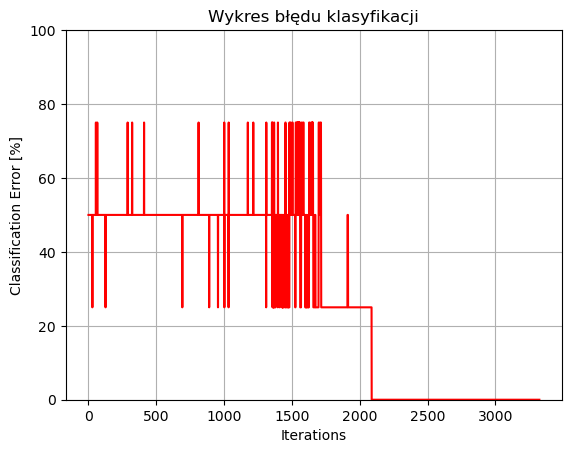

In [14]:
plt.plot(CE,'r')
plt.xlabel('Iterations')
plt.ylabel('Classification Error [%]')
plt.ylim([0, 100])
plt.title('Wykres błędu klasyfikacji')
plt.grid(True)
plt.show()

### Błąd średniokwadratowy MSE

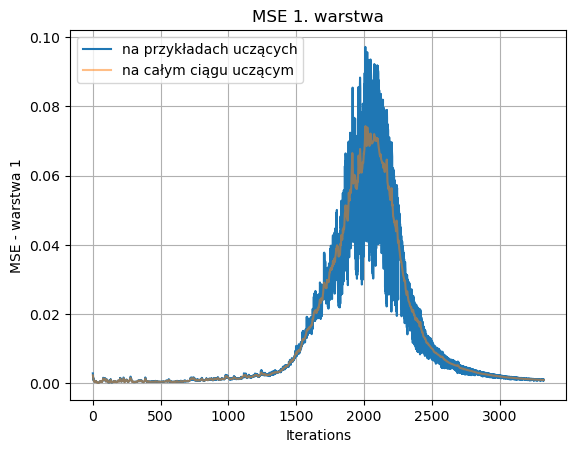

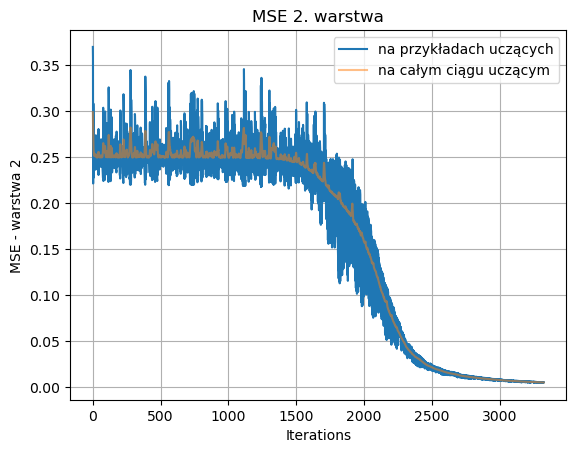

In [15]:
plt.plot(MSE1, label='na przykładach uczących')
plt.plot(MSE1cu, label='na całym ciągu uczącym',alpha = 0.5)
plt.ylabel('MSE - warstwa 1')
plt.xlabel('Iterations')
plt.title('MSE 1. warstwa')
plt.grid(True)
plt.legend()

plt.show()

plt.plot(MSE2, label='na przykładach uczących')
plt.plot(MSE2cu, label='na całym ciągu uczącym',alpha = 0.5)
plt.ylabel('MSE - warstwa 2')
plt.xlabel('Iterations')
plt.title('MSE 2. warstwa')
plt.grid(True)
plt.legend()
plt.show()

### Parametry sieci

Wykresy dla 1 warstwy

uwaga: tym samym kolorem na wykresach zaznaczono wagi i bajasy "wchodzące" do tego samego neuronu w warstwie 1. #zmiana zdania 

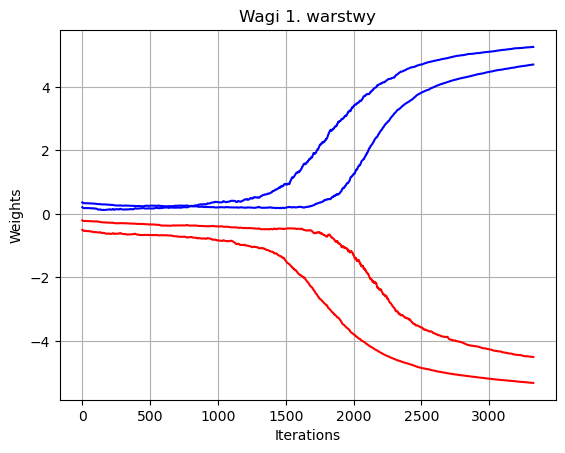

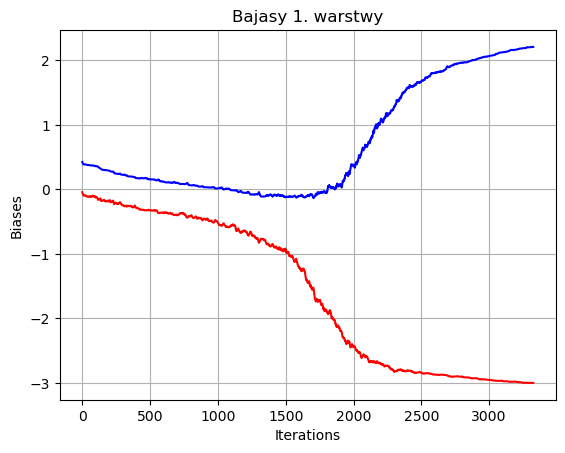

In [16]:
plt.plot([Ws1[n][0]for n in range(0,len(Ws1))],'b')
plt.plot([Ws1[n][1] for n in range(0,len(Ws1))],'r')

plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Wagi 1. warstwy')
plt.grid(True)

plt.show()

plt.plot([[bs1[n][0][0]] for n in range(0,len(bs1))],'b')
plt.plot([[bs1[n][0][1]] for n in range(0,len(bs1))],'r')

plt.xlabel('Iterations')
plt.ylabel('Biases')
plt.title('Bajasy 1. warstwy')
plt.grid(True)

plt.show()

Wykresy dla 2 warstwy

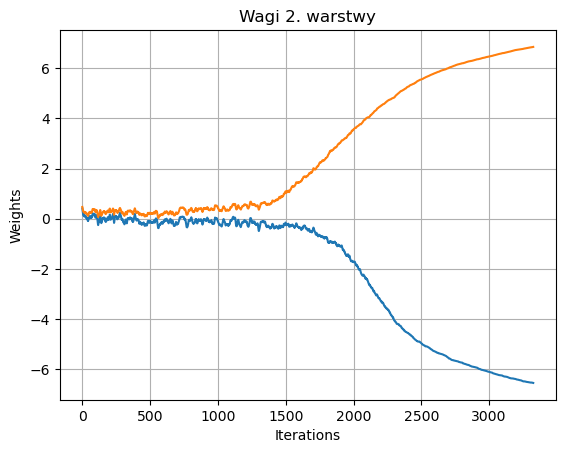

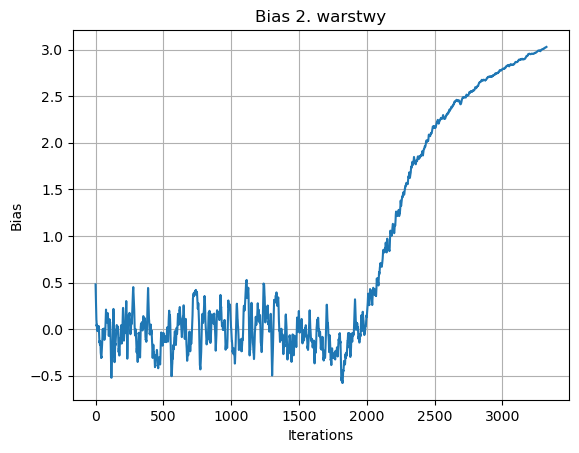

In [17]:
plt.plot([np.concatenate((Ws2[n][0],Ws2[n][1]),axis=0) for n in range(0,len(Ws2))])
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Wagi 2. warstwy')
plt.grid(True)
plt.show()

plt.plot([bs2[n][0] for n in range(0,len(Ws2))])

plt.xlabel('Iterations')
plt.ylabel('Bias')
plt.title('Bias 2. warstwy')
plt.grid(True)
plt.show()

## Wnioski
* Wprowadzenie opcji wcześniejszego zakończenia uczenia po osiągnięciu zadanego błędu pozwoliło na redukcję czasu potrzebnego na uczenie modelu, co jest istotne w praktycznych zastosowaniach, szczególnie dla dużych zbiorów danych.

* Momentum: Dodanie składnika momentum do algorytmu uczenia poprawiło stabilność procesu, pozwalając na przyspieszenie uczenia w obszarach płaskich funkcji błędu oraz łatwiejsze unikanie lokalnych minimów.

* Adaptacyjny współczynnik uczenia: Zastosowanie zmiennego współczynnika uczenia umożliwiło dynamiczne dopasowanie tempa nauki. Podczas badań zauważyłem, że współczynnik uczenia przekracza wartość 1. Często zdażało się tak, że sieć znacząco szybciej kończyła uczenie. Jednak były sytuacje gdzie sieć stawała się bardzo niestabilna i współczynnik uczenia uciekał do nieskończoności. Dlatego dodałem możliwość zablokowania jego wartości w zakresie mniejszym lub równym 1.

* Z jakiegoś powodu adaptacyjny współczynnik uczenia nie działał poprawnie gdy sieć uczono mniejszymi przykładami uczącymi. 

* Zmiana rozmiaru kroku uczenia (mini-batch): Wprowadzenie mini-batchów wpłynęło na poprawę wydajności procesu uczenia, umożliwiając zrównoważenie szybkości i stabilności aktualizacji wag.

## Źródła
* Publikacja dr. Ciskowskiego "Poznawanie własności sieci neuronowych w środowisku MATLAB": https://dbc.wroc.pl/dlibra/publication/22701/edition/19826?language=pl
* Artykuł Neural Network xor example from scratch (no libs): https://www.codingame.com/playgrounds/59631/neural-network-xor-example-from-scratch-no-libs
* Artykuł Siddhartha Dutta "Implementing the XOR Gate using Backpropagation in Neural Networks": https://towardsdatascience.com/implementing-the-xor-gate-using-backpropagation-in-neural-networks-c1f255b4f20d
* Artykuł Aniruddha Karajgi "How Neural Networks Solve the XOR Problem": https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7
* Poradnik autorstwa Samson Zhang: https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras
* Artykuł Jason Brownlee PhD "A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size": https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
* Wykłady